### Importing Relevant Packages

In [13]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Loading Data and Preprocessing

In [14]:
 raw_data = yfinance.download(tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = '1994-01-07', end = '2019-09-01', 
                              interval = '1d', group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  4 of 4 completed


In [15]:
df_comp = raw_data.copy()

In [16]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [17]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']

In [18]:
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

### Creating Returns

In [19]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1).mul(100)
df_comp['ret_dax'] = df_comp.dax.pct_change(1).mul(100)
df_comp['ret_nikkei'] = df_comp.spx.pct_change(1).mul(100)

### Normalizing

In [ ]:
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp[1]) * 100
df_comp['norm_ret_ftse'] = df_comp.ret_ftse.div(df_comp[1]) * 100
df_comp['norm_ret_dax'] = df_comp.ret_dax.div(df_comp[1]) * 100
df_comp['norm_ret_nikkei'] = df_comp.ret_nikkei.div(df_comp[1]) * 100

### Splitting the Data

In [20]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Fitting

In [23]:
start_date = '2014-07-15'
end_date = '2015-01-01'
model_ret_sarimax = SARIMAX(df.ret_nikkei[1:],exog=df[['ret_spx','ret_dax','ret_ftse']][1:], 
                          order = (3,1,4), seasional_oder = (3, 0, 2,5))
results_ret_sarimax = model_ret_sarimax.fit()
df_pred_sarimax = results_ret_sarimax.predict(start = start_date, end = end_date, 
                                            exog = df_test[['ret_spx','ret_dax', 'ret_ftse']][start_date:end_date])

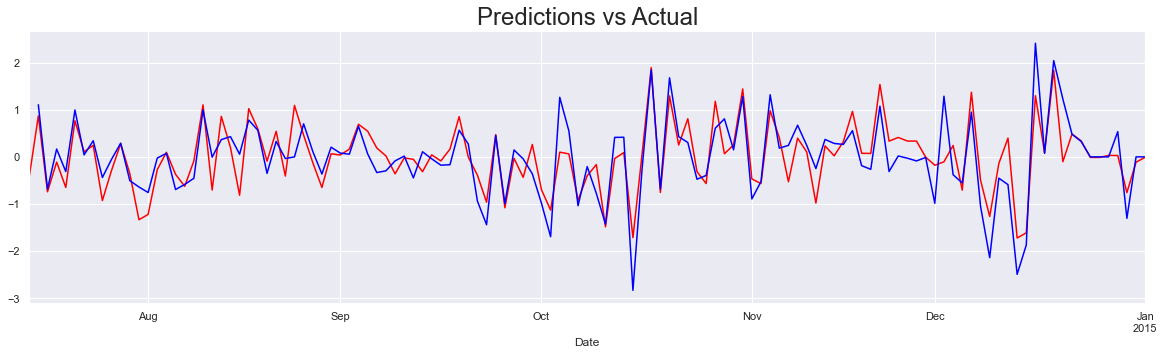

In [24]:
df_pred_sarimax[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ret_nikkei[start_date:end_date].plot(color = 'blue')
plt.title('Predictions vs Actual', size = 24)
plt.legend()
plt.show()

In [27]:
start_date = '2014-07-15'
end_date = '2015-01-01'
model_ret_sarimax1 = SARIMAX(df.ret_ftse[1:],exog=df[['ret_spx','ret_dax','ret_nikkei']][1:], 
                          order = (3,0,4), seasional_oder = (3, 0, 2,5))
results_ret_sarimax1 = model_ret_sarimax1.fit()
df_pred_sarimax1 = results_ret_sarimax1.predict(start = start_date, end = end_date, 
                                            exog = df_test[['ret_spx','ret_dax', 'ret_nikkei']][start_date:end_date])

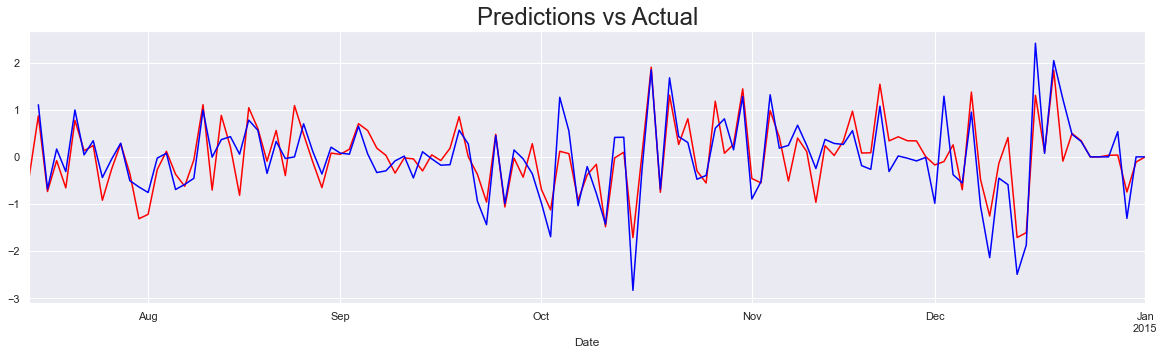

In [28]:
df_pred_sarimax1[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(color = 'blue')
plt.title('Predictions vs Actual', size = 24)
plt.show()